### Zulfahmi

#### Job Connector Data Science Batch 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv', low_memory=False)
tsa2 = tsa.copy()
tsa2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [3]:
tsa2.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [4]:
tsa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [5]:
tsa2.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [6]:
tsaDescr = []
for i in tsa2.columns :
    tsaDescr.append([i,
                    tsa2[i].dtypes,
                    tsa2[i].isna().sum(),
                    round((((tsa2[i].isna().sum())/(len(tsa2)))*100),2),
                    tsa2[i].nunique(),
                    tsa2[i].drop_duplicates().sample(2).values])

pd.DataFrame(tsaDescr, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2011030480921, 1126057M]"
1,Date Received,object,70,0.14,3522,"[31-Aug-15, 19-Mar-10]"
2,Incident Date,object,570,1.12,10788,"[10/25/2009 6:49, 3/23/2012 0:00]"
3,Airport Code,object,2052,4.02,405,"[SPI, BZN]"
4,Airport Name,object,2052,4.02,419,"[Southeast Texas Regional, Forney Army Airfield]"
5,Airline Name,object,8555,16.75,243,"[ERA aviation Air, Alitalia]"
6,Claim Type,object,1960,3.84,8,"[Motor Vehicle, Complaint]"
7,Claim Site,object,190,0.37,6,"[Checkpoint, -]"
8,Item,object,1012,1.98,1854,"[Currency; Jewelry - Fine, Lamps (including su..."
9,Claim Amount,object,992,1.94,13248,"[$160.36 , $10.45 ]"


In [7]:
tsa2.replace('-', np.nan, inplace=True)

In [8]:
tsa2['Date Received']

0         7-Feb-02
1        20-Jun-02
2        12-Jul-02
3        21-Aug-02
4         9-Sep-02
           ...    
51061    22-Oct-15
51062     2-Nov-15
51063    16-Nov-15
51064    20-Nov-15
51065    22-Dec-15
Name: Date Received, Length: 51066, dtype: object

In [9]:
tsa2.dropna(subset=['Date Received'], inplace=True)
tsa2['Date Received'] = pd.to_datetime(tsa2['Date Received'])

In [10]:
tsa2['Date Received']

0       2002-02-07
1       2002-06-20
2       2002-07-12
3       2002-08-21
4       2002-09-09
           ...    
51061   2015-10-22
51062   2015-11-02
51063   2015-11-16
51064   2015-11-20
51065   2015-12-22
Name: Date Received, Length: 50996, dtype: datetime64[ns]

In [11]:
tsa2['Incident Date']

0         1/6/2003 0:00
1        6/16/2002 0:00
2        5/31/2002 0:00
3        7/12/2002 0:00
4        8/30/2002 0:00
              ...      
51061         19-Oct-15
51062          2-Nov-15
51063         14-Sep-15
51064         16-Oct-15
51065         20-Dec-15
Name: Incident Date, Length: 50996, dtype: object

In [12]:
df = pd.DataFrame(tsa2, index=[13729,14323,14856,14976,14995,15278,15934,16813,17198,19151,21528,22161,23232,24355,24525,24768,24903,25249,25705,25734,26129,26530,27086,27481,27628,27819,27901,28031,28037,29652,31140,31570,31590,31771,33613])
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [13]:
month_dict = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

def format_dates(reg, date_string):
    m = reg.match(date_string)
    if(m):
        day, month, year = m.group(1,2,3)
        return "{}/{}/{}".format(month_dict[month],day,'20'+year)
    else:
        return date_string

In [14]:
tsa2.dropna(subset=['Incident Date'], inplace=True)

tsa2['Incident Date'] = tsa2['Incident Date'].str.replace('-','/')
tsa2['Incident Date'] = tsa2['Incident Date'].str.lower()

tsa2['Incident_Time'] = tsa2['Incident Date'].str.split(' ').map(lambda x: x[-1])
tsa2['Incident_Date'] = tsa2['Incident Date'].str.split(' ').map(lambda x: x[0])

reg = re.compile(r'/[a-z]{3}/[0-9]{4}')
tsa2 = tsa2[tsa2['Incident Date'].map(lambda x: not bool(reg.search(x)))].sort_values(['Date Received'])

reg = re.compile(r'(\d*)/([a-z]{3})/(1[1-4])$')
tsa2['Incident Date'] = tsa2['Incident Date'].map(lambda x: format_dates(reg,x))
tsa2[tsa2['Incident Date'].map(lambda x: bool(reg.search(x)))].sort_values(['Date Received'])

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident_Time,Incident_Date


In [15]:
tsa2['Incident Date'] = pd.to_datetime(tsa2['Incident Date'])
tsa2['Incident Date']

24276   2005-08-02
0       2003-01-06
1       2002-06-16
2       2002-05-31
3       2002-07-12
           ...    
50151   2015-12-18
50393   2015-12-19
24270   2005-07-20
24271   2003-12-20
24272   2005-04-30
Name: Incident Date, Length: 50424, dtype: datetime64[ns]

In [16]:
tsa2['Day Differences'] = tsa2['Date Received'] - tsa2['Incident Date']
tsa2['Day Differences'] = tsa2['Day Differences'].apply(lambda x: x.days)

In [43]:
tsa2['Day Differences'] = pd.to_numeric(tsa2['Day Differences'])

Text(0.5, 1.0, 'Day Differences Distribution')

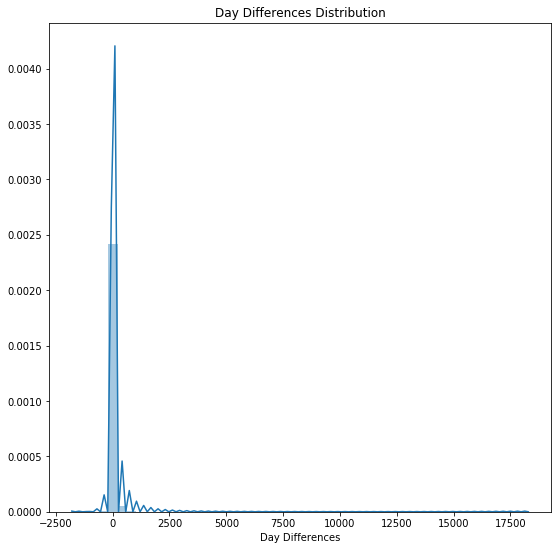

In [44]:
plt.figure(figsize=(9,9))
sns.distplot(tsa2['Day Differences'])
plt.title('Day Differences Distribution')

TypeError: can only concatenate str (not "float") to str

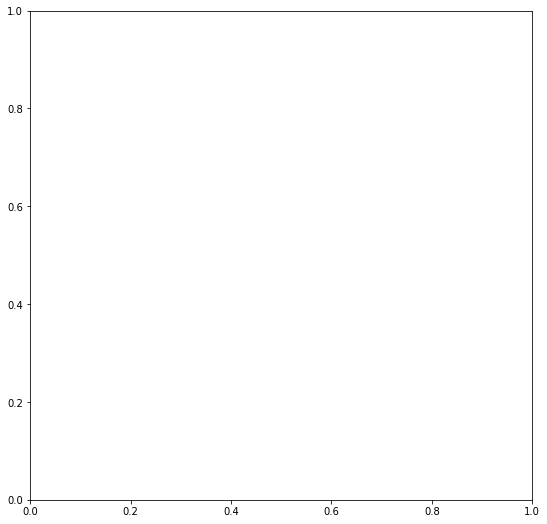

In [45]:
plt.figure(figsize=(9,9))
sns.distplot(tsa2[tsa2['Day Differences'] <= 0])
plt.title('Day Differences Distribution less than 0')

In [ ]:
plt.figure(figsize=(9,9))
sns.distplot(tsa2[tsa2['Day Differences'] >= 1000])
plt.title('Day Differences Distribution more than 1000')

In [24]:
tsa2['Claim Amount'] = tsa2['Claim Amount'].str.replace('$', '')
tsa2['Claim Amount'] = tsa2['Claim Amount'].str.replace(';','.',)

In [25]:
tsa2['Claim Amount']

24276       61.64 
0           50.00 
1        2.270.09 
2          200.00 
3           21.44 
           ...    
50151      400.00 
50393          NaN
24270       32.14 
24271        8.48 
24272       96.58 
Name: Claim Amount, Length: 50424, dtype: object

In [22]:
tsa2['Close Amount'] = tsa2['Close Amount'].str.replace('$', '')
tsa2['Close Amount'] = tsa2['Close Amount'].str.replace(';','.')

In [23]:
tsa2['Close Amount']

24276    35.70 
0        50.00 
1           NaN
2         0.00 
3        21.00 
          ...  
50151       NaN
50393       NaN
24270     0.00 
24271     8.48 
24272     0.00 
Name: Close Amount, Length: 50424, dtype: object

In [29]:
tsa2['Claim Amount'].values

array(['61.64 ', '50.00 ', '2.270.09 ', ..., '32.14 ', '8.48 ', '96.58 '],
      dtype=object)

In [35]:
tsa2['Claim Amount'] = pd.to_numeric(tsa2['Claim Amount'], errors='coerce')
tsa2['Close Amount'] = pd.to_numeric(tsa2['Close Amount'], errors='coerce')

In [38]:
tsa2['Amount Differences'] = tsa2['Claim Amount'] - tsa2['Close Amount']

In [41]:
tsa2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident_Time,Incident_Date,Day Differences,Amount Differences
24276,2005091992666,2000-09-08,2005-08-02,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,61.64,Settled,35.7,Settle,0:00,8/2/2005,-1789.0,25.94
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,0:00,1/6/2003,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,NaN,Canceled,NaN,NaN,0:00,6/16/2002,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,0:00,5/31/2002,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,0:00,7/12/2002,40.0,0.44


ValueError: cannot convert float NaN to integer

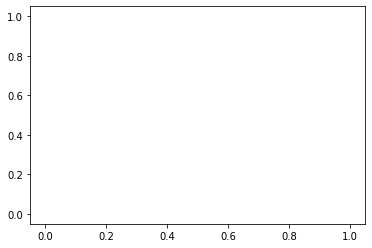

In [42]:
sns.distplot(tsa2['Amount Differences'])

In [46]:
tsa2['Close Amount'].describe()

count    32995.000000
mean        63.287230
std        130.595513
min          0.000000
25%          0.000000
50%          0.000000
75%         64.530000
max        998.970000
Name: Close Amount, dtype: float64

In [47]:
tsa2['Claim Amount'].describe()

count    41987.000000
mean       172.471449
std        208.389183
min          0.000000
25%         21.000000
50%         94.350000
75%        250.000000
max        999.990000
Name: Claim Amount, dtype: float64

In [49]:
tsa2['Amount Differences'].describe()

count    29080.000000
mean       152.438424
std        206.635625
min       -431.100000
25%          0.000000
50%         67.500000
75%        215.460000
max        999.990000
Name: Amount Differences, dtype: float64

In [50]:
Q1 = tsa2['Amount Differences'].describe()['25%']
Q3 = tsa2['Amount Differences'].describe()['75%']

In [51]:
IQR = Q3- Q1

In [52]:
IQR

215.45999999999998